# Preliminaries

Install the needed packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [2]:
from dissipationtheory.constants import ureg
from dissipationtheory.dissipation9a import CantileverModel, SampleModel3, SampleModel4
from dissipationtheory.dissipation9b import SampleModel3Jit, SampleModel4Jit

In [3]:
from dissipationtheory.dissipation9e import twodimCobject

In [4]:
THIS = 'dissipation-theory--Study-59--'
figs = {}
obj = {}
results = {}

# Metal sample

## Example setup

In [5]:
cantilever4 = CantileverModel(
    f_c = ureg.Quantity(62, 'kHz'),
    k_c = ureg.Quantity(2.8, 'N/m'), 
    V_ts = ureg.Quantity(1, 'V'), 
    R = ureg.Quantity(30, 'nm'),
    angle = ureg.Quantity(20, 'degree'),
    L = ureg.Quantity(1000, 'nm')
)

In [6]:
sample4 = SampleModel4(
    cantilever = cantilever4,
    z_r = ureg.Quantity(100, 'nm')  # ignored
)
sample4_jit = SampleModel4Jit(**sample4.args())

In [7]:
obj['IV'] = twodimCobject(sample4_jit)
obj['IV'].addtip(h=ureg.Quantity(10, 'nm'))

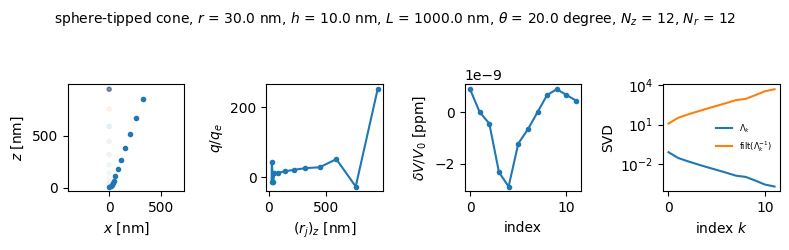

In [8]:
obj['IV'].solve(0.)
_ = obj['IV'].plot()

In [9]:
obj['IV'].properties()

Collect selected results.  The full results can be obtained from `obj['IV'].results`.

In [10]:
results['IV'] = {}
for key in ['Delta f [Hz]', 'gamma [pN s/m]']:
    results['IV'][key] = obj['IV'].results[key]
results['IV']

{'Delta f [Hz]': -88.32572509840101, 'gamma [pN s/m]': -0.0}

## Analyze data

Analyze data recorded by Virginia McGhee over gold on 08/11/2023.  This data was previously analyzed in Study 37.  The measured cantilever frequency was $62 \: \mathrm{kHz}$ and the manufacturer-specified spring constant was $2.8 \: \mathrm{N}/\mathrm{m}$.

In [11]:
filename = '20230811-ringdown-Gold_data_summary.csv'

cols_list = \
['Distance from Surface [nm]', 
 'Curvature [Hz/V^2]',
 'Curvature std [Hz/V^2]']

data = pd.read_csv(filename, usecols=cols_list)

In [12]:
rename_dict = \
    {'Distance from Surface [nm]': 'h [nm]',
     'Curvature [Hz/V^2]': 'f2 [Hz/V^2]',
     'Curvature std [Hz/V^2]': 'stdev f2 [Hz/V^2]'}

data.rename(columns=rename_dict, inplace=True)

In [13]:
data

,h [nm],f2 [Hz/V^2],stdev f2 [Hz/V^2]
0,37.5,12.548678,0.503368
1,40.5,9.644799,0.253236
2,43.5,7.194810,0.201747
3,46.5,7.497982,0.170096
4,49.5,5.519482,0.012767
5,52.5,5.582289,0.071206
6,55.5,4.565261,0.060349
7,58.5,4.433819,0.056613
8,61.5,3.801423,0.029397
9,64.5,3.871571,0.048265


In [14]:
def plotdata(data):
    
    fig = plt.figure(figsize=(3.50, 3.00))
    
    plt.errorbar(
        data['h [nm]'], 
        data['f2 [Hz/V^2]'],
        yerr=data['stdev f2 [Hz/V^2]'],
        fmt='.')

    plt.xlabel('tip-sample separation $h$ [nm]')
    plt.ylabel('$f_2$ [Hz/V$^2$]' )
    plt.xscale('log')
    plt.yscale('log')
    
    plt.tight_layout()

    return fig

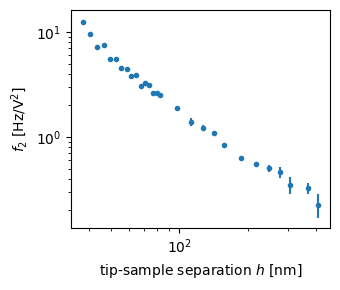

In [15]:
_ = plotdata(data)

You can now try to fit the data to obtain the tip radius and cone (half) angle ...

In [25]:
# Your code could go here.

# Semi-infinite semiconductor sample

## Example setup

In [16]:
cantilever3 = CantileverModel(
    f_c = ureg.Quantity(62, 'kHz'),
    k_c = ureg.Quantity(2.8, 'N/m'), 
    V_ts = ureg.Quantity(1, 'V'), 
    R = ureg.Quantity(30, 'nm'),
    angle = ureg.Quantity(20, 'degree'),
    L = ureg.Quantity(1000, 'nm')
)

In [17]:
sample3 = SampleModel3(
    cantilever = cantilever3,
    epsilon_s = ureg.Quantity(complex(20, 0), ''),
    sigma = ureg.Quantity(1e-7, 'S/m'),
    rho = ureg.Quantity(1e21, '1/m^3'),
    z_r = ureg.Quantity(100, 'nm')   # ignored
)
sample3_jit = SampleModel3Jit(**sample3.args())

In [18]:
obj['III'] = twodimCobject(sample3_jit)
obj['III'].addtip(h=ureg.Quantity(10, 'nm'))

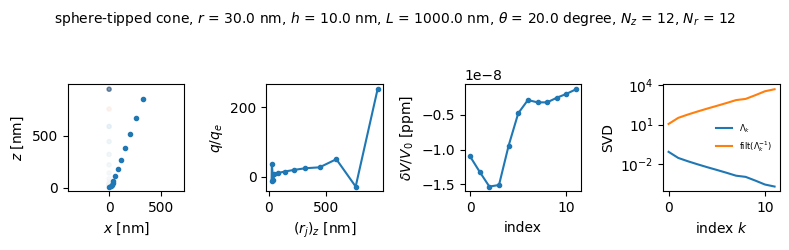

In [19]:
obj['III'].solve(0.)
_ = obj['III'].plot()

In [20]:
obj['III'].properties()

Collect selected results.  The full results can be obtained from `obj['III'].results`.

In [21]:
results['III'] = {}
for key in ['Delta f [Hz]', 'gamma [pN s/m]']:
    results['III'][key] = obj['III'].results[key]
results['III']

{'Delta f [Hz]': -59.598715922697615, 'gamma [pN s/m]': 0.8716272741742804}

To fit capacitance versus light-intensity data, vary the charge density only.  The dc frequency shift should be independent of the conductivity, so just fix the conductivity at a small number.

In [24]:
# Your code could go here.

::: {.content-hidden when-format="html"}

# Save the figures

In [22]:
if 0:
    for num in figs.keys():
        figname = THIS + "Fig-" + num
        figs[num].savefig(figname + '.png', dpi=300)
        figs[num].savefig(figname + '.pdf')

# Formatting notes

The header at the top of this file is for creating a nicely-formatted `.html` document using the program `quarto` ([link](https://quarto.org/)).  To create nicely-formated `.html`versions of this notebook, run `quarto` from the command line as follows

    quarto render dissipation-theory--Study-59.ipynb && open dissipation-theory--Study-59.html
    
:::